In [1]:
"""Basically this is to  use few unsupervised learninga lgorithm to form distints clusters from the chosen datasets"""


# Import the require modules
import pandas as pd  
from pandas import DataFrame
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

iris = datasets.load_iris()  # Load the iris data

a = iris.data[:, 1:3]  # Utilize columns 2 and 3
a_df = DataFrame(a, columns=['x1', 'x2'])  # make dataframe
kmeans = KMeans(n_clusters=2).fit(a_df)  # fit KMeans model
centroids = kmeans.cluster_centers_  # determine centroids
centroids

array([[2.87575758, 4.92525253],
       [3.40980392, 1.49215686]])

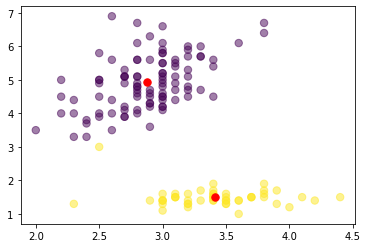

In [2]:
kmeans.labels_  # data points within the cluster
plt.scatter(a_df['x1'], a_df['x2'],c = kmeans.labels_.astype(float), s=55,alpha =0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=55)

model convergence: True
iteration numbers: 3
model means: [[4.90510174 1.67562587]
 [1.46181979 0.2459275 ]]
model covariances: [[[0.67738979 0.2869288 ]
  [0.2869288  0.1790691 ]]

 [[0.02950256 0.00593661]
  [0.00593661 0.01086666]]]


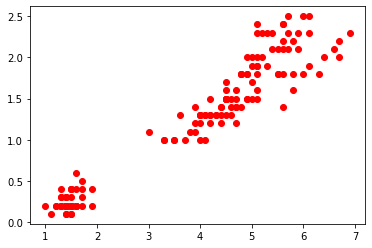

In [3]:
"""Gausian mixture model"""

b = iris.data[:, 2:]  # Utilize columns from 3
b_df = DataFrame(b)  # make dataframe

gmm = GaussianMixture(n_components = 2).fit(b_df)   # fit GMM model
l = gmm.predict(b_df)  # fit GMM model
print('model convergence:', gmm.converged_)  # Confirm the model convergence
print('iteration numbers:', gmm.n_iter_)  # Confirm the number of iterations
print('model means:', gmm.means_)  # determine the cluster means
print('model covariances:', gmm.covariances_)  # determine the cluster covariance

plt.scatter(b_df[0], b_df[1], c = 'r')

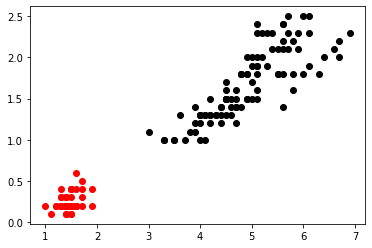

In [4]:
# ploting in distinct colours
b0 = b_df[l == 0]
b1 = b_df[l == 1]
plt.scatter(b0[0], b0[1], c = 'k')
plt.scatter(b1[0], b1[1], c = 'r')
plt.show()

In [5]:
"""Hierarchical model: A visual dendogram that takes either divisive of agglomerative approach"""

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
dat = pd.read_csv('id.csv')  # Load the local csv data
d = dat.iloc[:, 1:]
dh = normalize(d)  # Normalize the scales of the entire columns
dhu = pd.DataFrame(dh, columns = d.columns)
dhu.head()

,Milk,Cloth,Sugar,Raw_food,Beef,Fish,Drinks,Electronics,Toy,Furniture
0,0.025639,0.051278,0.026280,0.018524,0.512776,0.512776,0.682505,0.025575,0.057687,0.002564
1,0.025749,0.051498,0.026399,0.018597,0.512444,0.512444,0.682934,0.025684,0.058130,0.002601
2,0.025860,0.051720,0.026520,0.018604,0.512059,0.512059,0.683449,0.025794,0.058515,0.002639
3,0.025970,0.051940,0.026639,0.018674,0.511699,0.511699,0.683917,0.025903,0.058968,0.002677
4,0.026077,0.052153,0.026756,0.018743,0.511346,0.511346,0.684375,0.026009,0.059419,0.002716


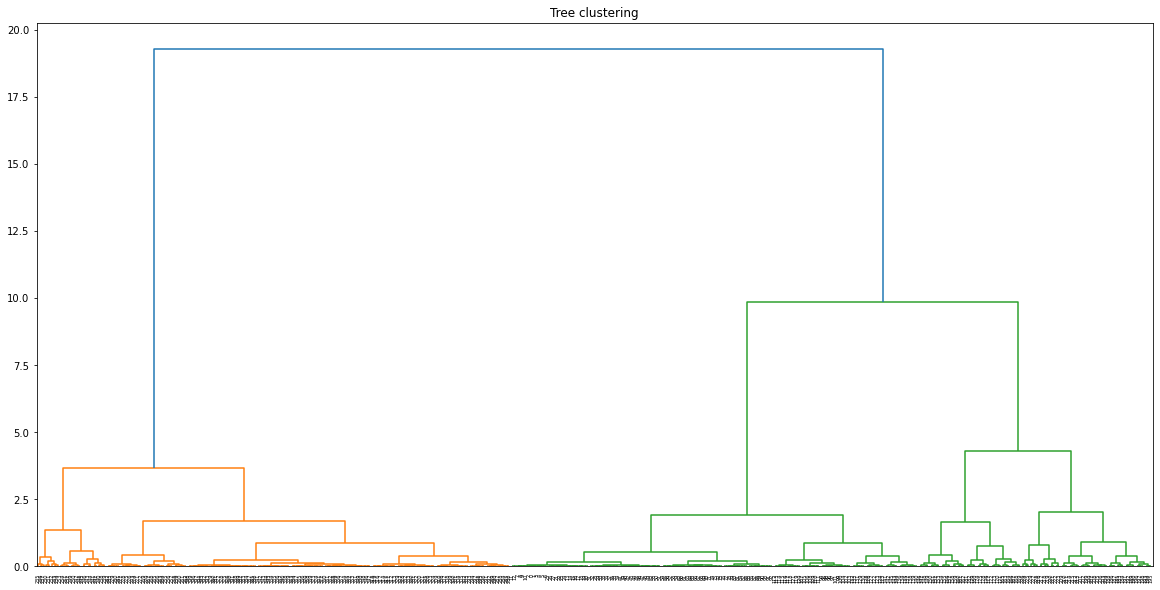

In [6]:
plt.figure(figsize=(20, 10))  # Plotting the tree to reveal the visual clustering
plt.title('Tree clustering')
tre = shc.dendrogram(shc.linkage(dhu, method='ward'))
plt.show()

In [7]:
"Applying the hierachy to the observed 2 clusters"

from sklearn.cluster import AgglomerativeClustering  # Import require module
cluster = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')  # Clustering parameters
cluster.fit_predict(dhu)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

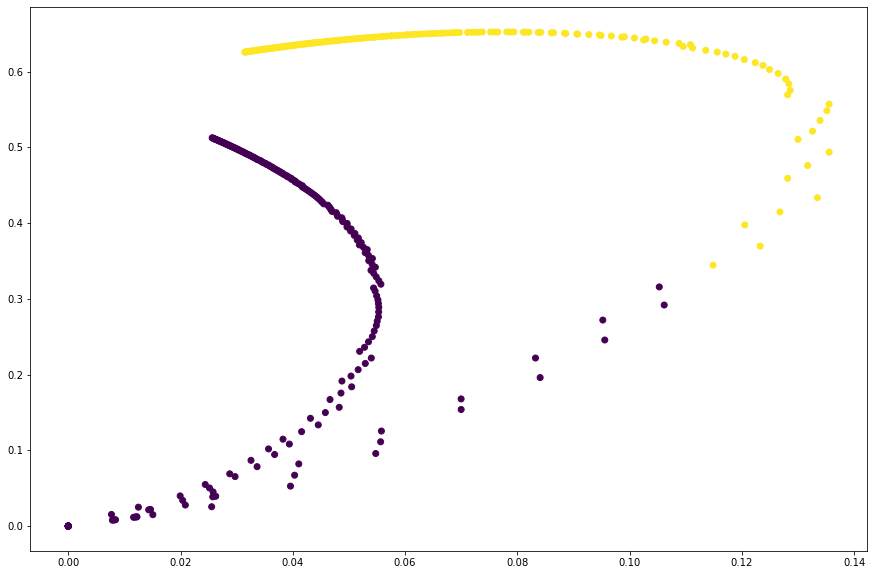

In [8]:
plt.figure(figsize=(15,10)) 
plt.scatter(dhu['Milk'], dhu['Beef'], c = cluster.labels_)  # plotting the selected data points
plt.show()

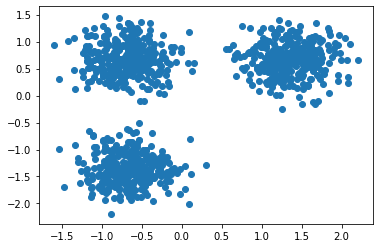

In [9]:
"""DBSCAN: Density based algorithm to categorize task"""

# Import require modules

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
c = [[2,2], [-2,-2],[-2,2]]
x, label_true = make_blobs(n_samples=1000, centers=c, cluster_std=0.6, random_state=0)  # Generate data sample
x = StandardScaler().fit_transform(x)
xx, yy = zip(*x)
plt.scatter(xx, yy)  # plotting the data points
plt. show()

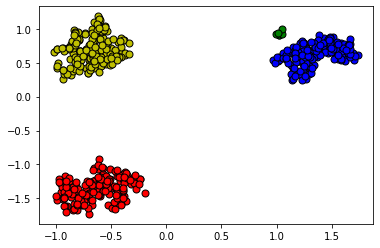

In [10]:
"""Setting hyperparameter for the DBSCAN"""

dbc = DBSCAN(eps=0.1, min_samples=10).fit(x)
core_points = dbc.core_sample_indices_
core_points_msk = np.zeros_like(dbc.labels_, dtype=bool)
core_points_msk[dbc.core_sample_indices_] = True
labels = dbc.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

"""Plotting in different colors"""

extreme_data_points = x[labels == -1]  # Outliers among the data points
extreme_data_points

ist_cluster = x[labels == 0]
znd_cluster = x[labels == 1]
thrd_cluster = x[labels == 2]
unique = set(labels)  # Plotting the clusters with unique colors
colors = ['r', 'b', 'y', 'g']
for k, col in zip(unique, colors):
    if k == -1:
        col == 'k'
    
    member_mask = (labels == k)
    xy = x[member_mask & core_points_msk]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=7)